In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline

In [10]:
prices = np.arange(300/10.0)
dates = np.arange(np.datetime64('2017-01-01'), np.datetime64('2017-01-'+str(len(prices)+1)))
dates

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30'], dtype='datetime64[D]')

In [11]:
df = pd.DataFrame()
df['Close'] = prices
df['Date'] = dates
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Close
Date,
2017-01-01,0.0
2017-01-02,1.0
2017-01-03,2.0
2017-01-04,3.0
2017-01-05,4.0


Text(0, 0.5, 'prices')

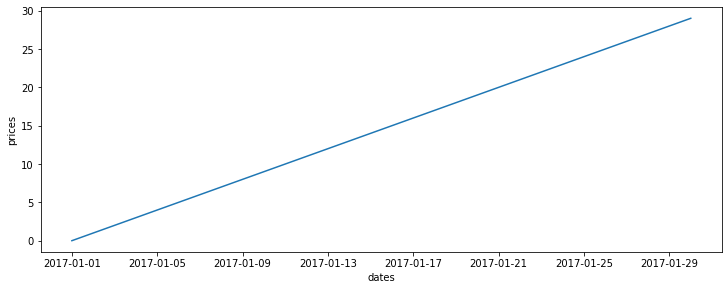

In [13]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, df['Close'])
plt.xlabel('dates')
plt.ylabel('prices')

In [14]:
def get_action(state):
    actions = {'buy':1, 'sell':-1, 'hold':0}
    return random.choice(list(actions.values()))

In [15]:
actions = [get_action(price) for price in prices]

In [16]:
df['action'] = df.apply(lambda row: get_action(row['Close']), axis=1)

In [17]:
df.head()

,Close,action
Date,,
2017-01-01,0.0,1
2017-01-02,1.0,1
2017-01-03,2.0,0
2017-01-04,3.0,0
2017-01-05,4.0,0


Text(0, 0.5, 'prices')

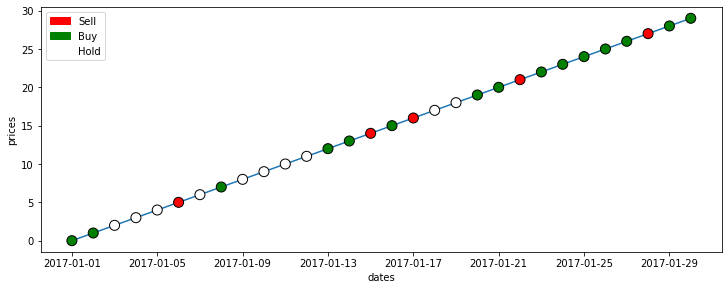

In [18]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, df['Close'], zorder=1, label='Close price')
col = np.where(df['action']==1,'green',np.where(df['action']==-1,'red','white'))
plt.scatter(df.index, df['Close'], color = col, alpha=1, marker='o', edgecolors = 'black', zorder=2, s=100, label='Buy/Sell/Hold')
red_patch = matplotlib.patches.Patch(color='red', edgecolor='black', label='Sell')
green_patch = matplotlib.patches.Patch(color='green', edgecolor='black', label='Buy')
white_patch = matplotlib.patches.Patch(color='white', edgecolor='black', label='Hold')
plt.legend(handles=[red_patch, green_patch, white_patch])
plt.xlabel('dates')
plt.ylabel('prices')

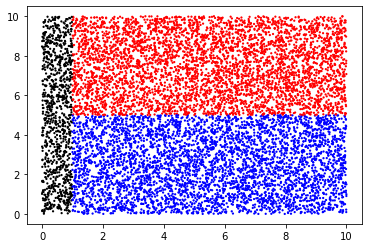

In [19]:
#generate some fake data
x = np.random.random(10000)*10
y = np.random.random(10000)*10

col = np.where(x<1,'k',np.where(y<5,'b','r'))

plt.scatter(x, y, c=col, s=5, linewidth=0)
plt.show()

In [20]:
np.where(df['action']==1)

(array([ 0,  1,  7, 12, 13, 15, 19, 20, 22, 23, 24, 25, 26, 28, 29],
       dtype=int64),)